In [110]:
import pandas as pd 
import numpy as np 
from scipy import stats
import matplotlib as mpl
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr
from sklearn.model_selection import KFold
import statistics as sta 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


In [111]:
df=pd.read_csv(  "D:\\project we\\New folder\\laptop_price.csv"    ,encoding="utf-8" ,index_col=0 ) 
df.head()
print(df['Memory'].unique())
df['Weight']=df['Weight'].apply(lambda x : float(x.split('kg')[0]))
df['Ram']=df['Ram'].apply(lambda x : float(x.split('GB')[0]))
df=df.drop('Product',axis=1)
df.head(30)


['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '1.0TB HDD' '512GB SSD +  1.0TB Hybrid' '256GB SSD +  1.0TB Hybrid']


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,
1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
6,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4.0,500GB HDD,AMD Radeon R5,Windows 10,2.10,400.00
7,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16.0,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97
8,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,1158.70
9,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16.0,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,1495.00


In [112]:
def MeomryNumber1(x:str):
  bucket=x.split()
  if('+' in bucket ):
    if((x.split()[0].find('GB')) != -1):
     return float(bucket[0].split('GB')[0])
    elif(x.split()[0].find('TB') != -1):
     return float(bucket[0].split('TB')[0])*1000
  else:
    if((bucket[0].find('GB')) != -1):
     return float(bucket[0].split('GB')[0])/2
    elif(bucket[0].find('TB') != -1):
     return float(bucket[0].split('TB')[0])*500
def MeomryNumber2(x:str):
  bucket=x.split()
  if('+' in bucket ):
    if((x.split('+')[1].find('GB')) != -1):
     return float(x.split('+')[1].strip().split('GB')[0])
    elif(x.split('+')[1].find('TB') != -1):
     return float(x.split('+')[1].strip().split('TB')[0])*1000
  else:
    if((bucket[0].find('GB')) != -1):
     return float(bucket[0].split('GB')[0])/2
    elif(bucket[0].find('TB') != -1):
     return float(bucket[0].split('TB')[0])*500
def MeomryType1(x:str):
  return x.split()[1:][0]
def MeomryType2(x:str):
    bucket=x.split()
    if('+' in bucket):
      forReturn=x.split('+')[-1].strip()
      return forReturn.split()[1:][0]
    else:
      return x.split()[1:][0]

df['Meomry size 1 in GB']=df['Memory'].apply(MeomryNumber1)
df['Meomry Type 1']=df['Memory'].apply(MeomryType1)

df['Meomry size 2 in GB']=df['Memory'].apply(MeomryNumber2)
df['Meomry Type 2']=df['Memory'].apply(MeomryType2)

df=df.drop(['Memory'],axis=1)
df.head(30)



,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Meomry size 1 in GB,Meomry Type 1,Meomry size 2 in GB,Meomry Type 2
laptop_ID,,,,,,,,,,,,,,
1,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,64.0,SSD,64.0,SSD
2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,Intel HD Graphics 6000,macOS,1.34,898.94,64.0,Flash,64.0,Flash
3,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,Intel HD Graphics 620,No OS,1.86,575.00,128.0,SSD,128.0,SSD
4,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,AMD Radeon Pro 455,macOS,1.83,2537.45,256.0,SSD,256.0,SSD
5,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,128.0,SSD,128.0,SSD
6,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4.0,AMD Radeon R5,Windows 10,2.10,400.00,250.0,HDD,250.0,HDD
7,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16.0,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97,128.0,Flash,128.0,Flash
8,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,Intel HD Graphics 6000,macOS,1.34,1158.70,128.0,Flash,128.0,Flash
9,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16.0,Nvidia GeForce MX150,Windows 10,1.30,1495.00,256.0,SSD,256.0,SSD


In [113]:
labelencoder=LabelEncoder()
df['ScreenResolution']=labelencoder.fit_transform(df['ScreenResolution'])
df['Cpu']=labelencoder.fit_transform(df['Cpu'])
df['Gpu']=labelencoder.fit_transform(df['Gpu'])
#df['Meomry Type 1']=labelencoder.fit_transform(df['Meomry Type 1'])
#df['Meomry Type 2']=labelencoder.fit_transform(df['Meomry Type 2'])
#df['Company']=labelencoder.fit_transform(df['Company'])
#df['OpSys']=labelencoder.fit_transform(df['OpSys'])
#df['TypeName']=labelencoder.fit_transform(df['TypeName'])
df=pd.get_dummies(df,columns=['Meomry Type 1','Meomry Type 2','Company','OpSys','TypeName'])
numerical=df.select_dtypes('number')
df



,Inches,ScreenResolution,Cpu,Ram,Gpu,Weight,Price_euros,Meomry size 1 in GB,Meomry size 2 in GB,Meomry Type 1_Flash,...,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS,TypeName_2 in 1 Convertible,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
laptop_ID,,,,,,,,,,,,,,,,,,,,,
1,13.3,23,65,8.0,58,1.37,1339.69,64.0,64.0,False,...,False,False,False,True,False,False,False,False,True,False
2,13.3,1,63,8.0,51,1.34,898.94,64.0,64.0,True,...,False,False,False,True,False,False,False,False,True,False
3,15.6,8,74,8.0,53,1.86,575.00,128.0,128.0,False,...,False,False,False,False,False,False,False,True,False,False
4,15.4,25,85,16.0,9,1.83,2537.45,256.0,256.0,False,...,False,False,False,True,False,False,False,False,True,False
5,13.3,23,67,8.0,59,1.37,1803.60,128.0,128.0,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,14.0,13,89,4.0,47,1.80,638.00,64.0,64.0,False,...,True,False,False,False,True,False,False,False,False,False
1317,13.3,19,89,16.0,47,1.30,1499.00,256.0,256.0,False,...,True,False,False,False,True,False,False,False,False,False
1318,14.0,0,34,2.0,40,1.50,229.00,32.0,32.0,True,...,True,False,False,False,False,False,False,True,False,False


In [114]:
#sns.histplot(df['Meomry Type 2'])

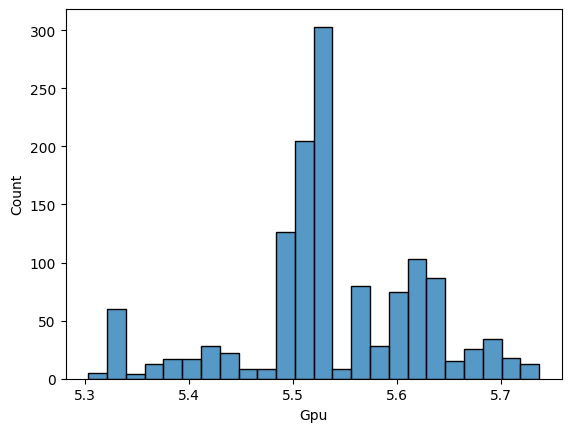

In [115]:
sns.histplot(np.log1p(df['Gpu']+200))
#looks acceptable to me 
scaler=MinMaxScaler()

df['Gpu']=scaler.fit_transform(pd.DataFrame(np.log1p(df['Gpu']+200)))
#df['Gpu']=sns.histplot(scaler.fit_transform(pd.DataFrame(np.log1p(df['Gpu']+200))))


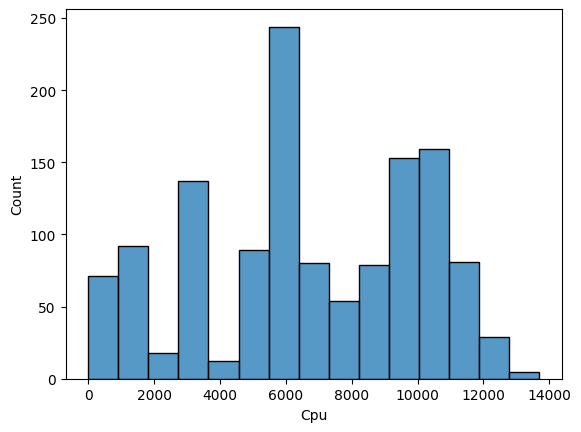

In [116]:
sns.histplot(df['Cpu']**2)
#kinda of noraml distrbution 
scaler=MinMaxScaler()

df['Cpu']=scaler.fit_transform(pd.DataFrame(df['Cpu']**2))

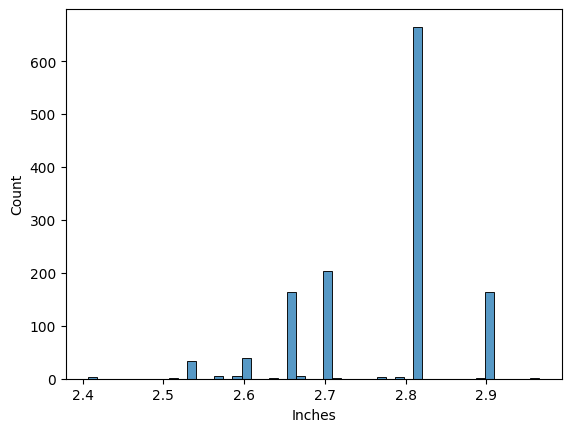

In [117]:
sns.histplot(np.log1p(df['Inches']),bins=50)

scaler=MinMaxScaler()

df['Inches']=scaler.fit_transform(pd.DataFrame(np.log1p(df['Inches'])))


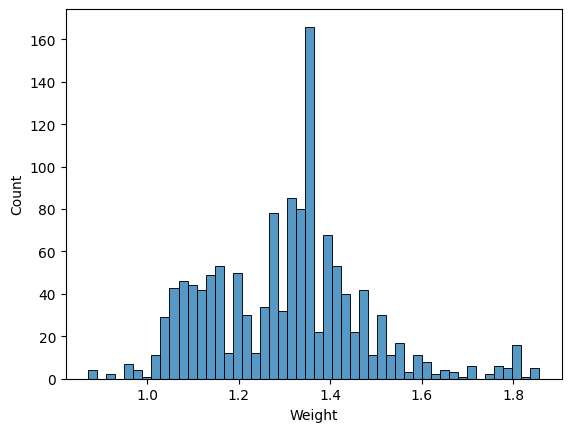

In [118]:
sns.histplot(np.log1p(df['Weight']+0.7),bins=50)
#seems good to me 

scaler=MinMaxScaler()

df['Weight']=scaler.fit_transform(pd.DataFrame(np.log1p(df['Weight']+0.7)))

In [163]:
#modeling
X_train,X_test,y_train,y_test=train_test_split(df.drop('Price_euros',axis=1),df['Price_euros'],test_size=0.2,random_state=1097)
linear=LinearRegression()
model=linear.fit(X_train,y_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_pred,y_test)
r2


0.7443714294254258